In [1]:
%load_ext autoreload
%autoreload 2

In [91]:
from abtem.waves import ProbeWaves
from abtem.io import read
from abtem.detect import AnnularDetector
from abtem.scan import GridScan

probe = ProbeWaves(energy=60e3, semiangle_cutoff=.03, defocus=50, build_on_gpu=True)

potential = read('graphene_potential.hdf5').to_gpu()

detector = AnnularDetector(inner=.086, outer=.19, build_on_gpu=True)

gridscan = GridScan(probe, potential, detectors=detector, start=[0,0], end=[np.sqrt(3) * 1.42, 3 * 1.42], sampling=.05, endpoint=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
measurements = gridscan.go(max_batch=200, show_progress=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x1eee5b16b88>,
 <matplotlib.image.AxesImage at 0x1eee5a8ab48>)

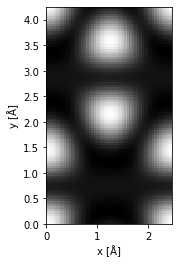

In [94]:
measurements[detector].plot()

In [1]:
from ase import Atoms, Atom
from ase.visualize import view
import numpy as np
from ase.visualize import view

atoms = Atoms()

with open('barium_neodymium_titanate_0_1_0.xyz','r') as f:
    l = f.readline()
    l = f.readline().split(' ')
    
    cell = [float(l[i]) for i in range(4,7)]
    
    while True:
        line = f.readline().split('  ')
        if line[0][:2] == '-1':
            break
        positions = [float(l) for l in line[1:4]]
        atoms += Atoms([int(line[0])], positions=np.array([positions]))

atoms.set_cell(cell)

#view(atoms)

atoms *= (1,2,1)
atoms.cell

Cell([22.3479, 24.4042, 7.6955])

In [2]:
%load_ext autoreload
%autoreload 2

from abtem.waves import ProbeWaves
from abtem.io import read
from abtem.detect import AnnularDetector
from abtem.potentials import Potential
from abtem.scan import GridScan
from tqdm.auto import tqdm

probe = ProbeWaves(energy=60e3, semiangle_cutoff=.03, defocus=50, build_on_gpu=True)

potential = Potential(atoms, sampling=.05, slice_thickness=2).precalculate().to_gpu()
#potential = read('graphene_potential.hdf5').to_gpu()



In [34]:
detector = AnnularDetector(inner=.086, outer=.19, build_on_gpu=True)

gridscan = GridScan(probe, potential, detectors=detector, sampling=.25, endpoint=False)

In [35]:
measurements = gridscan.go(max_batch=1, show_progress=True)

KeyboardInterrupt: 

In [3]:
from abtem.waves import PrismWaves

prism = PrismWaves(energy=60e3, expansion_cutoff=.03, build_on_gpu=True)
prism.match_grid(potential)

#for i in tqdm(range(1000)):
S = prism.build()

In [5]:
detector = AnnularDetector(inner=.086, outer=.19, build_on_gpu=True)

gridscan = GridScan(S, potential, detectors=detector, sampling=.25, endpoint=False)

measurements = gridscan.go(max_batch=1, show_progress=True)

AttributeError: 'ScatteringMatrix' object has no attribute 'multislice_at'

In [18]:
S = prism.build()

In [22]:
from sys import getsizeof


getsizeof(S.array) * 1e-9

7.1311676